In [34]:
# run this on top of all of Your notebooks -- it does all the dirty imports.
exec(open('initialize_jupyter_handybeam.py').read())
import scipy.signal.windows
import strathclyde

# Use the Array Builder

## Set up the Array Builder with some initial parameters

In [35]:
focal_point=(0.0,30e-3,40e-3)
focal_radius=np.sqrt(focal_point[0]**2+focal_point[1]**2+focal_point[2]**2)

In [66]:
importlib.reload(strathclyde) # this makes sure that any changes to the source code are being used in this session

array_builder=strathclyde.LinearArray(
    radiation_frequency=500e3,
    sound_velocity=5600,
    sampling_density=11,
    passive_aperture=32e-3,
    element_pitch=3e-3,
    element_width=1e-3,
    element_count=16,
    focal_point=focal_point,
    amplitude_setting=1e4,
    window_coefficients=scipy.signal.windows.kaiser(16,beta=1))
array_builder

Basic linear probe:
> Environment:
>>   radiation frequency: 500.0kHz
>>   sound_velocity :5600.0m/s
>>   sound wave length :11.200mm
>>   medium wavenumber: 89.3[waves/meter]
>>   point sources sampling density: 11pt/lambda linear, spacing of 1.018mm
  
> Probe definition:
>>   Passive aperture: 32.0mm
>>   element width: 1.000mm
>>   element count: 16
  
> Probe calculated properties:
>>   inter-element gap: 2.0mm
>>   Active aperture: 48.0mm
>>   Active aperture near field transition/boundary: 51.4mm
>>   Passive aperture near field transition/boundary: 22.9mm
  
> Focal point calculated properties:
>>   focal distance: 50.0mm
>>   active aperture -6dB focal spot size: 11.9mm
>>   passive aperture -6dB natural focus spot size: 8.2mm

## Visualize the settings of the Array Builder

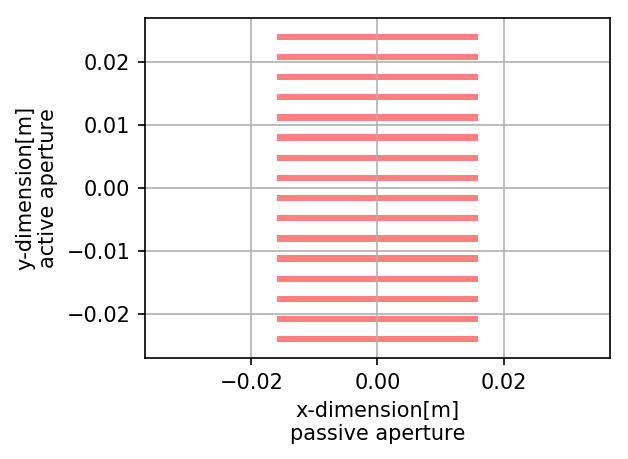

In [67]:
array_builder.visualize_array_elements() # visualize with output to screen
array_builder.visualize_array_elements(filename='example_visualize_array_elements.png') # save figure to disk

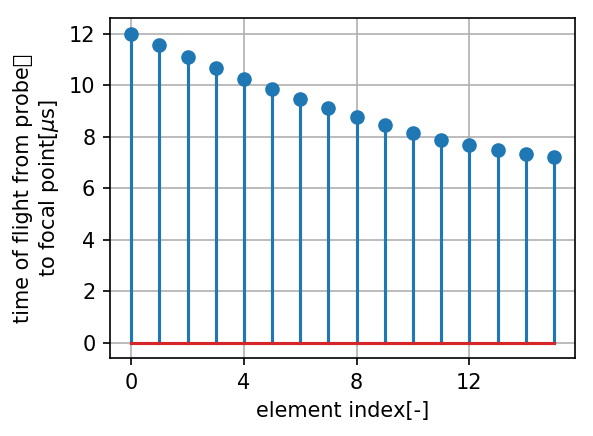

In [68]:
array_builder.visualize_time_of_flight() # visualize with output to screen
array_builder.visualize_time_of_flight(filename='example_visualize_time_of_flight.png') # save figure to disk

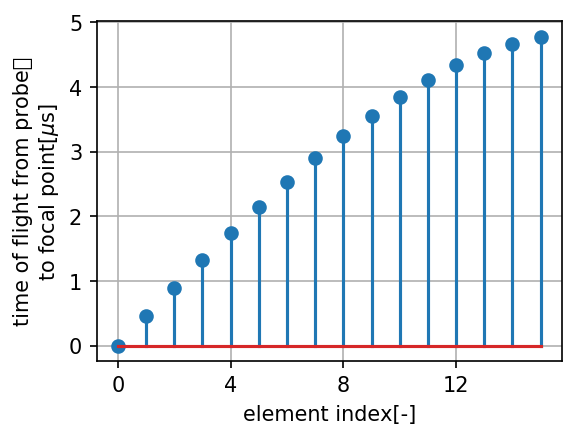

In [69]:
array_builder.visualize_focal_laws()
array_builder.visualize_focal_laws(filename='example_visualize_focal_laws.png')

In [70]:
# these are avaliable properties and methods
# dir(array_builder)

In [71]:
#??array_builder.focal_distance

### Visualizes the point cloud of points that simulate the element aperture

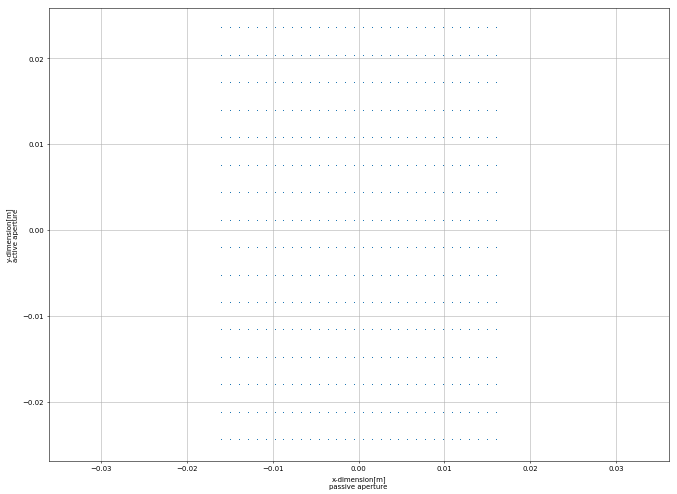

In [72]:
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50)
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50,filename='example_point_cloud_all_elements.png')

## Create the HandyBeam simulation object

In [73]:
handybeam_world = array_builder.create_handybeam_world()

# Use the HandyBeam package

## Set up the pressure field sampling grids

In [74]:
# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.1

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3

# Set plane height 

sampler_grid_centre = 300e-3

# Add a rectilinear sampling grid to the world.
importlib.reload(handybeam.samplers.rectilinear_sampler)
rectilinear_sampler_xz = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((1,0,0)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xz)

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3
sampler_grid_centre = 150e-3

rectilinear_sampler_xy = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((0,0,1)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xy)

RectilinearSampler: 576x576 points, spacing 1.12000mm
RectilinearSampler: 576x576 points, spacing 1.12000mm


In [75]:
# get some details about the points in the tx array descriptor
print(handybeam_world.tx_array.tx_array_element_descriptor.shape)
print(handybeam_world.tx_array.tx_array_element_descriptor.dtype)
print(handybeam_world.tx_array.describe_element(0))

(512, 16)
float32
element 0: 
 >        (xyz) =(-16.0, -24.5, 0.0)mm
 >    (normals) =(0.0, 0.0, 1.0)
 > (dir coeffs) =(phase_c1:0.0, | amp:(9.999999974752427e-07, 0.0, 0.0)
 >  amp setting =7898.48291015625
 >        phase =0.0
 >       (nans) =(nan, nan, nan, nan) 



## Ask the pressure fields to be computed, or "propagated"

In [76]:
rectilinear_sampler_xz.propagate(print_performance_feedback=True)
rectilinear_sampler_xy.propagate(print_performance_feedback=True)

global_work_size: (576, 576, 1)
local_work_size:  (576, 1, 1)
profiling: info:
profiling: wall time: 0.0297[sec] == 33.7[FPS]
profiling: kernel time : 24911.8[us] == 40.1[FPS]
profiling: compute performance: 6818.8[MRays/sec]
profiling: memcopy time: 2627.1[us] == 380.6[FPS]
profiling: memcopy bandwidth: 2.4[GB/sec]
profiling: command bandwidth: 131856.5[CPS]
global_work_size: (576, 576, 1)
local_work_size:  (576, 1, 1)
profiling: info:
profiling: wall time: 0.0369[sec] == 27.1[FPS]
profiling: kernel time : 32024.6[us] == 31.2[FPS]
profiling: compute performance: 5304.3[MRays/sec]
profiling: memcopy time: 2658.8[us] == 376.1[FPS]
profiling: memcopy bandwidth: 2.3[GB/sec]
profiling: command bandwidth: 126008.1[CPS]


## Visualize the general acoustic field generated

Note that generating the 3D figure is rather slow -- it may take some seconds before you see it. Use patience.

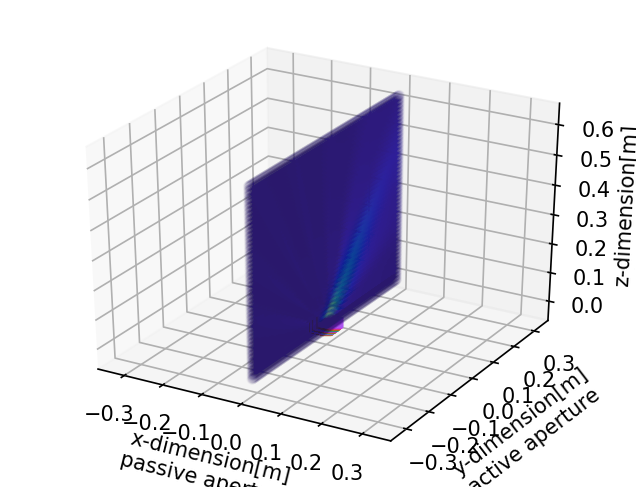

In [77]:
import handybeam.visualise
importlib.reload(handybeam.visualise)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02,filename="field_xz_3D.png")

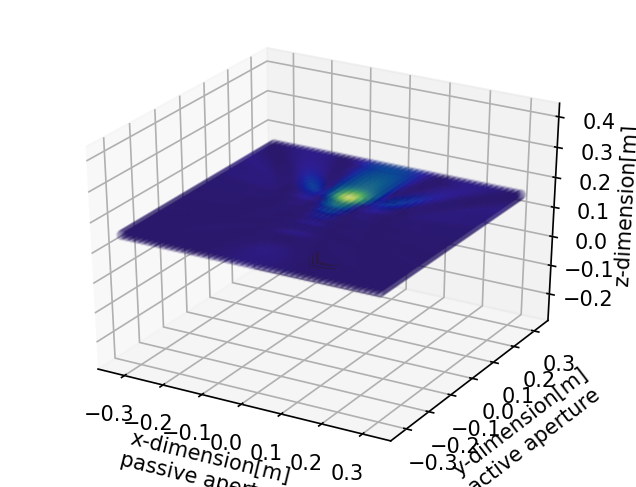

In [78]:
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03,filename="field_xy_3D.png")

In [79]:
# You can get the actual pressures (complex numbers) from here:
# feel free to visualize and process these Yourself

# rectilinear_sampler_xz.pressure_field
# rectilinear_sampler_xz.coordinates
# dir(rectilinear_sampler_xz)


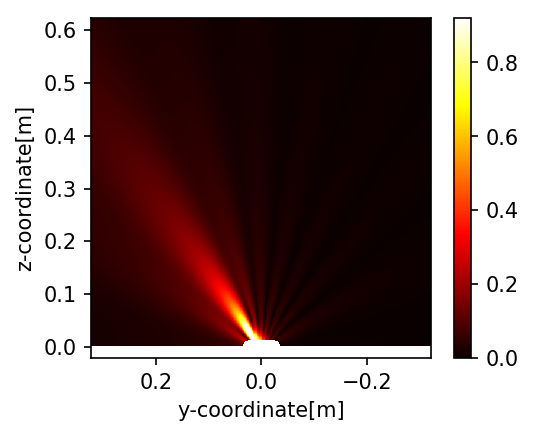

In [80]:
importlib.reload(strathclyde)
strathclyde.visualize_2d_amplitude_xz(rectilinear_sampler_xz) # the "xz" version attempts to give You real-world coordinates. Only works for well-aligned grids.

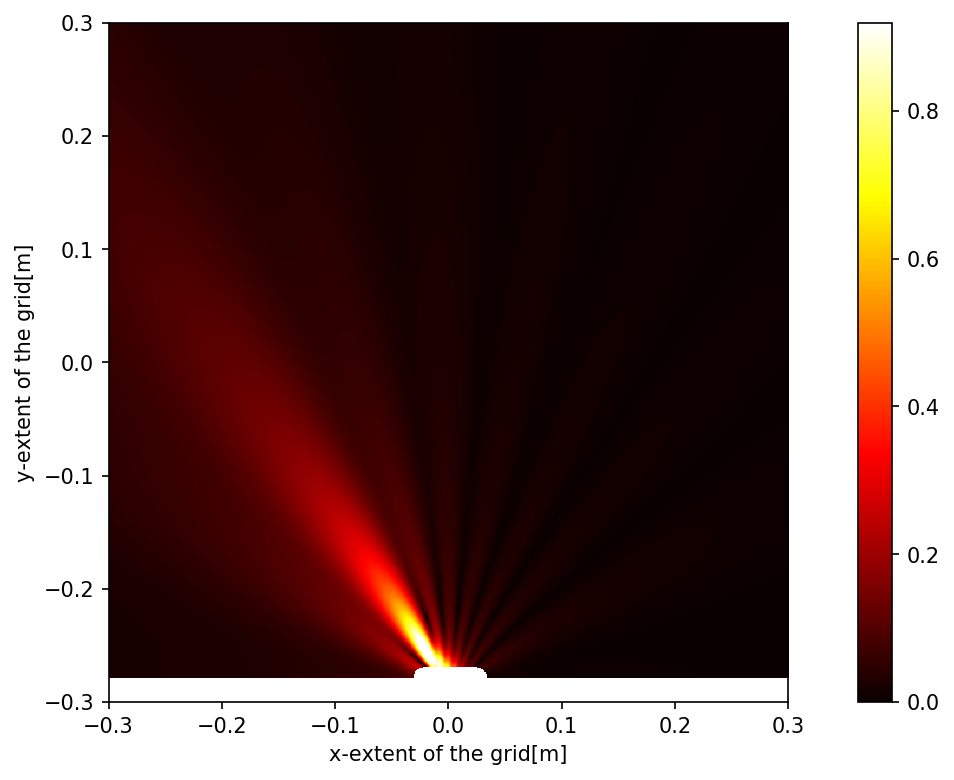

In [81]:
# side section, looking from the side of the array
strathclyde.visualize_2d_amplitude(rectilinear_sampler_xz,figsize=(12,6)) # This is a more general visualizer that uses the grid coordinates. Note, these are not world coordinates.


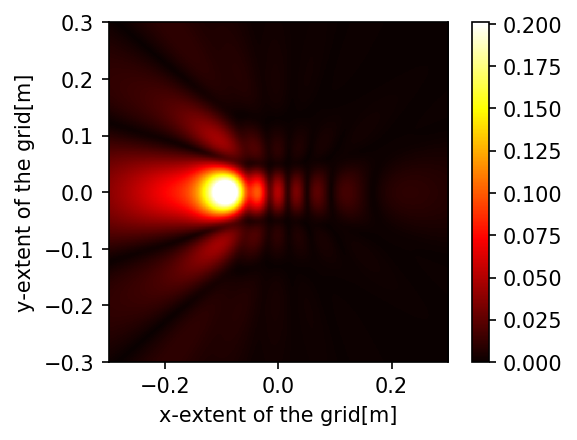

In [82]:
# top section, loking down onto the array
strathclyde.visualize_2d_amplitude(rectilinear_sampler_xy)

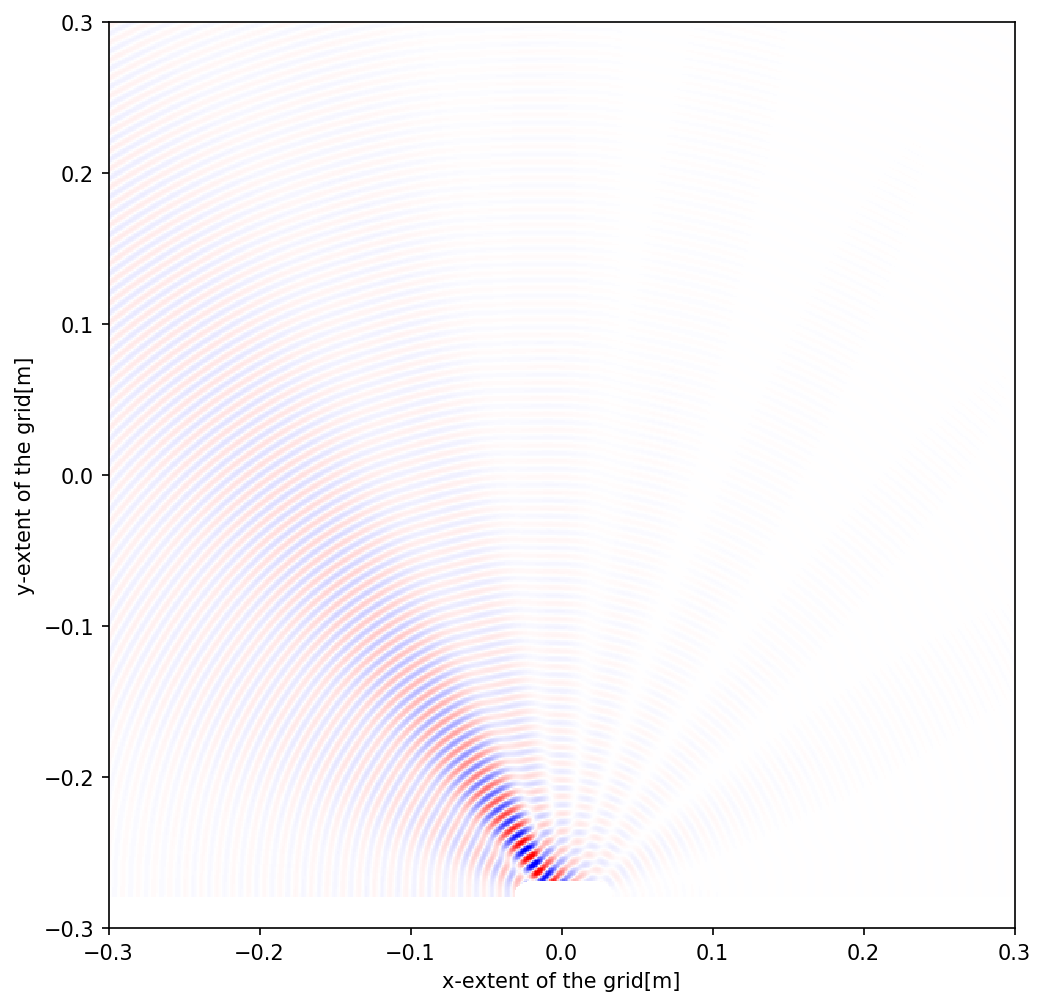

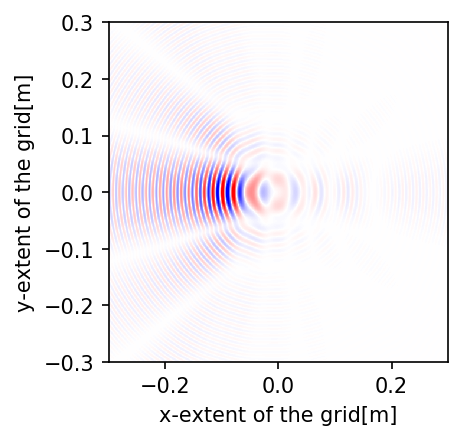

In [83]:
strathclyde.visualize_2d_real(rectilinear_sampler_xz,figsize=(12,8))
strathclyde.visualize_2d_real(rectilinear_sampler_xy)

## Calculate the pressure distribution in a semicircle around the array

### Create the sampler

In [84]:
# create a sampling line, semi-circle around the array, to sample the field there
tau=2*np.pi
sampler_radius=focal_radius
sampler_angles=np.linspace(-tau/4,tau/4,num=2048,endpoint=True)
ys=np.sin(sampler_angles)*sampler_radius
zs=np.cos(sampler_angles)*sampler_radius
xs=np.zeros(ys.shape)

In [85]:
importlib.reload(handybeam.samplers.clist_sampler)
semicircle_sampler=handybeam_world.add_sampler(handybeam.samplers.clist_sampler.ClistSampler())
semicircle_sampler.add_sampling_points(xs,ys,zs)

### Propagate and visualize

In [86]:
semicircle_sampler.propagate(print_performance_feedback=True)

sampling_point_count=2048
global_work_size_x=2048
profiling: info:
profiling: wall time: 0.0025[sec] == 398.4[FPS]
profiling: kernel time : 717.8[us] == 1393.1[FPS]
profiling: compute performance: 1460.8[MRays/sec]
profiling: memcopy time: 2.7[us] == 367647.1[FPS]
profiling: memcopy bandwidth: 5.6[GB/sec]
profiling: command bandwidth: 132978.7[CPS]


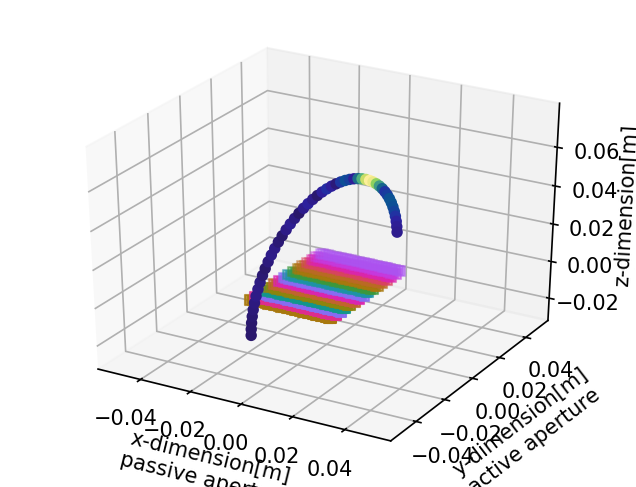

In [87]:
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[semicircle_sampler],alpha=1)

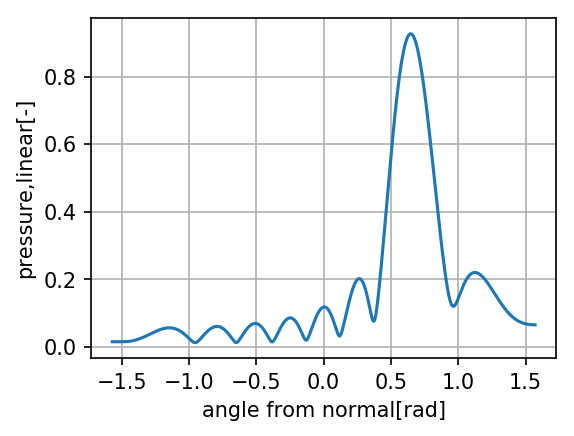

In [88]:
importlib.reload(handybeam.visualise) # this is for editing the library only, can be removed for production - reloads changes
handybeam.visualise.plot_1D_pressure_vs_angle(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field))
handybeam.visualise.plot_1D_pressure_vs_angle(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field),filename='pressure_linear.png')


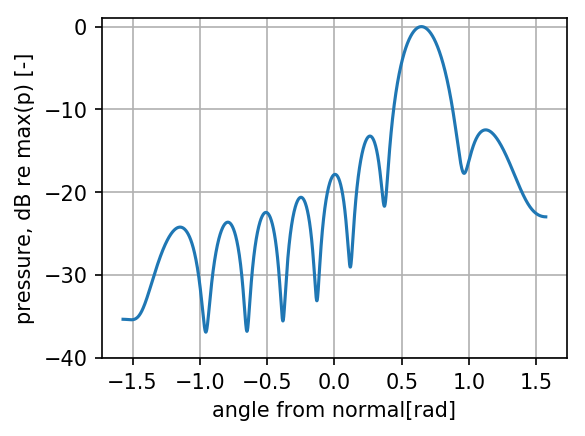

In [89]:
handybeam.visualise.plot_1D_pressure_vs_angle_db_normalized(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field))

## Analyse the main lobe and side lobe data

In [90]:
importlib.reload(strathclyde)
stats=strathclyde.analyse_semicircle_sampled_data(sampler_angles,sampler_radius,semicircle_sampler.pressure_field)
stats

{'pabs': array([0.01588484, 0.01588469, 0.01588419, ..., 0.06593747, 0.06593273,
        0.06593147], dtype=float32),
 'peak_p': 0.92643803,
 'peak_location_idx': 1445,
 'peak_location_angle': 0.6468887657489488,
 'p_db': array([-35.31667 , -35.31675 , -35.317024, ..., -22.953682, -22.954304,
        -22.954472], dtype=float32),
 'db_mask_3db': array([False, False, False, ..., False, False, False]),
 'beam_width_idx': 168,
 'first_up': 1364,
 'last_up': 1531,
 'beam_width_3db_radians': 0.2562999380310189,
 'beam_width_linear': 0.012814996901550947,
 'mask_main_lobe_right': 1699,
 'mask_main_lobe_left': 1196,
 'mask_main_lobe': array([False, False, False, ..., False, False, False]),
 'power_main_lobe': 117.451324,
 'power_side_lobes': 13.267578,
 'peak_sidelobe': 0.2207151,
 'contrast_mts_ratio': 18.941324949264526}

In [95]:
strathclyde.print_analysis(stats)

Main lobe:
 >> peak amplitude value: 0.92643803358078
 >> peak location : 0.647 radians = 37.06 degrees
 >> angular width (-3dB): 0.256 radians = 14.68 degrees
 >> linear width (-3dB): {:0.3f} 
integrated main lobe power: 117.45132446289062
Side lobes:
 >> peak side lobe value :0.22071510553359985
 >> integrated side lobe power: 13.267578125
Contrast metric:
 >> integrated main lobe to side lobe ratio: 18.94 dB


## Visualize the main lobe and side lobe mask location

Text(0.5,0,'sampler_angles[rad]')

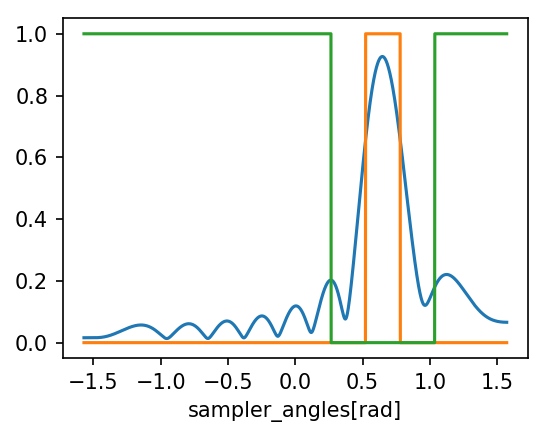

In [96]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(sampler_angles,np.abs(semicircle_sampler.pressure_field),sampler_angles,stats['db_mask_3db'],sampler_angles,~stats['mask_main_lobe'])
plt.xlabel('sampler_angles[rad]')

In [93]:
display(HTML("applying full width style...<style>.container { width:100% !important; }</style>"))

In [94]:
import handybeam.cl_system
handybeam.cl_system.print_cl_platforms()

------------
platform: 0, name = NVIDIA CUDA
--- platform 0, device 0 : name= GeForce GTX 1070 with Max-Q Design
------------
platform: 1, name = Intel(R) OpenCL
--- platform 1, device 0 : name= Intel(R) UHD Graphics 630
--- platform 1, device 1 : name= Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz


## Export the focal laws (delays and gains) to Onscale

In [65]:
print(array_builder.export_focal_laws_to_onscale(filename="onscale_focal_laws.txt"))


symb tshift0 = 0.000000e+00
symb eweight0 = 0.000000e+00
symb tshift1 = 4.541646e-07
symb eweight1 = 4.322727e+02
symb tshift2 = 8.974918e-07
symb eweight2 = 1.654347e+03
symb tshift3 = 1.328631e-06
symb eweight3 = 3.454915e+03
symb tshift4 = 1.746045e-06
symb eweight4 = 5.522642e+03
symb tshift5 = 2.147988e-06
symb eweight5 = 7.500000e+03
symb tshift6 = 2.532491e-06
symb eweight6 = 9.045085e+03
symb tshift7 = 2.897342e-06
symb eweight7 = 9.890738e+03
symb tshift8 = 3.240087e-06
symb eweight8 = 9.890738e+03
symb tshift9 = 3.558032e-06
symb eweight9 = 9.045085e+03
symb tshift10 = 3.848275e-06
symb eweight10 = 7.500000e+03
symb tshift11 = 4.107759e-06
symb eweight11 = 5.522642e+03
symb tshift12 = 4.333361e-06
symb eweight12 = 3.454915e+03
symb tshift13 = 4.522013e-06
symb eweight13 = 1.654347e+03
symb tshift14 = 4.670861e-06
symb eweight14 = 4.322727e+02
symb tshift15 = 4.777445e-06
symb eweight15 = 0.000000e+00



In [33]:
# some humour:

# uncomment below to get the effect.

In [34]:
# import this

In [35]:
# import antigravity